# Сборный проект

### Описание проекта

Проект для интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Прелоставленны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и компания планирует кампанию на 2017-й. 

Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 


### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Загрузка данных и изучение общей информации

Импортируем необходимые библиотеки и просмотрим данные 

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math
import seaborn

from IPython.display import display_html
from itertools import chain,cycle

import warnings

warnings.simplefilter('ignore')


In [2]:
data = pd.read_csv('games.csv')
display(data.sample(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5006,LocoRoco,PSP,2006.0,Platform,0.14,0.04,0.16,0.03,83.0,8.7,E
168,Pokemon Stadium,N64,1999.0,Strategy,3.18,1.24,0.94,0.09,NaN,NaN,NaN
5777,Shaun White Snowboarding,PS2,2008.0,Sports,0.15,0.12,0.00,0.04,NaN,tbd,E10+
2796,Yoshi,GB,1991.0,Puzzle,0.00,0.00,0.73,0.00,NaN,NaN,NaN
2617,Secret Agent Barbie: Royal Jewels Mission,GBA,2002.0,Platform,0.56,0.21,0.00,0.01,71.0,tbd,E
1380,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009.0,Action,0.90,0.38,0.00,0.12,72.0,6.1,E10+
4044,Kane & Lynch 2: Dog Days,X360,2010.0,Shooter,0.20,0.22,0.01,0.05,NaN,NaN,NaN
1441,SingStar Party,PS2,2004.0,Misc,0.00,1.04,0.00,0.31,NaN,NaN,NaN
12967,Doraemon 2: Nobita no Toizurando Daibouken,SNES,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
7120,Legion: The Legend of Excalibur,PS2,2002.0,Action,0.11,0.09,0.00,0.03,51.0,7,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Я вижу множественные пропуски и не соответствие типов данных. Приступим к предподготовке данных.

## Шаг 2. Подготовка данных

    1. Необходимо заменить названия столбцов на аналогичные в нижнем регистре
    2. Преобразовать данные в нужные типы
    3. Обработать пропуски и объяснить почему обработал их именно так. 
    4. Описать причины появления возможных пропусков
    5. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец


### Приведем названия столбцов к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем последовательно данные в нужные типы

In [4]:
data['year_of_release'].unique()          

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [5]:
data[data['year_of_release'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+
9706,Rocksmith,PC,NaN,Misc,0.06,0.04,0.00,0.01,78.0,8.1,T
8680,Jurassic Park: The Game,X360,NaN,Action,0.15,0.00,0.00,0.01,60.0,3.6,T
6636,Jonah Lomu Rugby Challenge,PS3,NaN,Sports,0.00,0.19,0.00,0.06,64.0,NaN,E
8260,Backbreaker,PS3,NaN,Sports,0.16,0.00,0.00,0.01,58.0,7,E
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
4294,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.00,0.02,89.0,8.9,M
13289,Reader Rabbit 2nd Grade,Wii,NaN,Misc,0.04,0.00,0.00,0.00,NaN,tbd,E
15675,Cabela's Alaskan Adventure,PS2,NaN,Sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
15338,Mario Tennis,3DS,NaN,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Мы видим небольшое количество пропусков в 'year_of_release', на данный момент мы не освоили инструменты парсинга для заполнения этих данных, поэтому при дальнейших исследованиях мы их учитывать не будем.

В следующем столбце присудствует значение 'tbd', что означает что рейтинг еще определяется. Проверим данные строки и заменим значение на Nan 

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
data.loc[data['user_score']=='tbd','user_score'] = None
data['user_score'] = data['user_score'].astype(float)
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Проверим пропуски и очистим данные них

Очистим данные от множественных пропусков в 'year_of_release'. Они могли появится из-за ошибок при сборе информации. Мы знаем что данные были собраны из открытых источников (автоматически?), что не исключает пропусков в данных.

In [8]:
data = data[data['year_of_release'].isna()==False].copy()
data['year_of_release'] = data['year_of_release'].astype(int)

display(data.isnull().sum())
data[data['name'].isnull()]

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно пропуски в жанре и названии так же включены в этот срез. Данные игры не скажутся на исследовании и я удалю эти строки

In [9]:
data = data[data['name'].isnull() == False]
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

В столбце 'rating' мы обнаружили устаревшие значения 'K-A'. Заменим их на 'E'

In [10]:
data.loc[data['rating']=='K-A','rating'] = 'E'

data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11155,Remington Super Slam Hunting: Alaska,Wii,2011,Sports,0.08,0.00,0.00,0.01,NaN,NaN,T
11454,The King of Fighters 2006,PS2,2006,Fighting,0.01,0.01,0.05,0.00,66.0,8.6,T
12189,Hyperdimension Neptunia Victory,PSV,2014,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12060,Disney's Winnie the Pooh's Rumbly Tumbly Adven...,GC,2005,Platform,0.05,0.01,0.00,0.00,NaN,NaN,NaN
2438,Dragon Ball Z: Burst Limit,PS3,2008,Fighting,0.22,0.33,0.18,0.12,71.0,7.2,T
7687,Power Rangers: Time Force,GBA,2001,Action,0.14,0.05,0.00,0.00,NaN,NaN,NaN
16437,Fashionable Puppy: Oshare na Koinu DS,DS,2007,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
6629,The Legend of Legacy,3DS,2015,Role-Playing,0.12,0.01,0.10,0.02,67.0,7.1,E10+
4612,Mega Man Anniversary Collection,GC,2004,Platform,0.32,0.08,0.00,0.01,81.0,8.8,E
11391,Transformers: Devastation,PS3,2015,Action,0.03,0.04,0.00,0.01,NaN,7.1,T


### Посчитаем суммарные продажи во всех регионах и заполним в отдельный столбец

In [11]:
data['total_na_sales'] = data['na_sales'].sum()
data['total_eu_sales'] = data['eu_sales'].sum()
data['total_jp_sales'] = data['jp_sales'].sum()
data['total_sales'] = data['jp_sales'] + data['eu_sales'] + data['na_sales']

data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_na_sales,total_eu_sales,total_jp_sales,total_sales
12654,Gegege no Kitarou: Youkai Daigekisen,DS,2008,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN,4341.42,2399.68,1290.64,0.06
7301,The Dukes of Hazzard: Return of the General Lee,PS2,2004,Racing,0.11,0.08,0.00,0.03,52.0,6.8,E,4341.42,2399.68,1290.64,0.19
11512,Pro Cycling Manager 2016,PS4,2016,Sports,0.00,0.07,0.00,0.01,NaN,NaN,NaN,4341.42,2399.68,1290.64,0.07
10814,MX SuperFly featuring Ricky Carmichael,XB,2002,Racing,0.07,0.02,0.00,0.00,NaN,NaN,NaN,4341.42,2399.68,1290.64,0.09
13059,Sacred 3,X360,2014,Role-Playing,0.03,0.02,0.00,0.00,51.0,4.1,M,4341.42,2399.68,1290.64,0.05
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,4341.42,2399.68,1290.64,12.56
15897,Elven Legacy Collection,PC,2010,Strategy,0.00,0.01,0.00,0.00,NaN,NaN,NaN,4341.42,2399.68,1290.64,0.01
12487,Imagine: Gymnast,DS,2008,Simulation,0.05,0.01,0.00,0.00,NaN,NaN,E,4341.42,2399.68,1290.64,0.06
13582,Honda ATV Fever,Wii,2010,Racing,0.04,0.00,0.00,0.00,NaN,NaN,E,4341.42,2399.68,1290.64,0.04
2813,Just Dance 2015,WiiU,2014,Misc,0.38,0.29,0.00,0.06,75.0,6.6,E10+,4341.42,2399.68,1290.64,0.67


Я подготовил данные для дальнейшего исследования

## Шаг 3. Провести исследовательский анализ данных

Выделены следующие задачи исследования:

1. Посмотреть, сколько игр выпускалось в разные годы. Опредеалить важны ли данные за все периоды?
2. Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. Ответить на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?
3. Выделить актуальный период на основе которого можно построить прогноз на 2017 год.
4. Ответить на вопрос "Какие платформы лидируют по продажам, растут или падают?" и выбрать несколько потенциальных платформ  
5. Построить графики по глобальным продажам игр в разбивке по платформам и описать результат.
6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
7. Соотнести выводы с продажами игр на других платформах.
8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?





### Посмотрим, сколько игр выпускалось в разные годы. 

<AxesSubplot:title={'center':'График кол-ва релизов'}, xlabel='Год', ylabel='Кол-во релизов'>

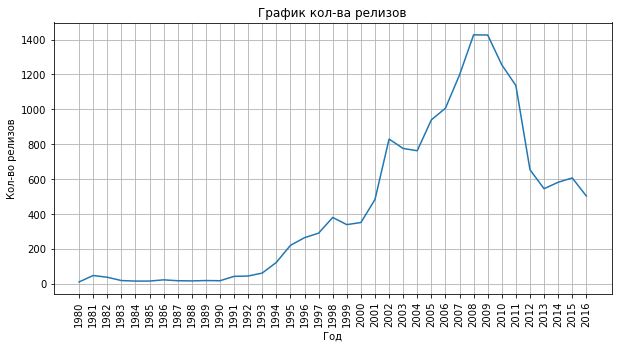

In [12]:
games = data.groupby('year_of_release')['platform'].count()

x = games.index
games.plot( kind = 'line', 
           title = 'График кол-ва релизов', 
           grid = True, 
           figsize = (10,5), 
           rot = 90, 
           xticks = x, 
           xlabel = 'Год',
           ylabel = 'Кол-во релизов' )

Видно что график сильно изменился с 2011-2012 года. Поэтому мы не будем рассматривать эти данные и в дальнейшем сделаем срез

### Посмотрим на продажи по платформам в разные годы

<AxesSubplot:title={'center':'График продаж'}, xlabel='Год', ylabel='Суммарные продажи'>

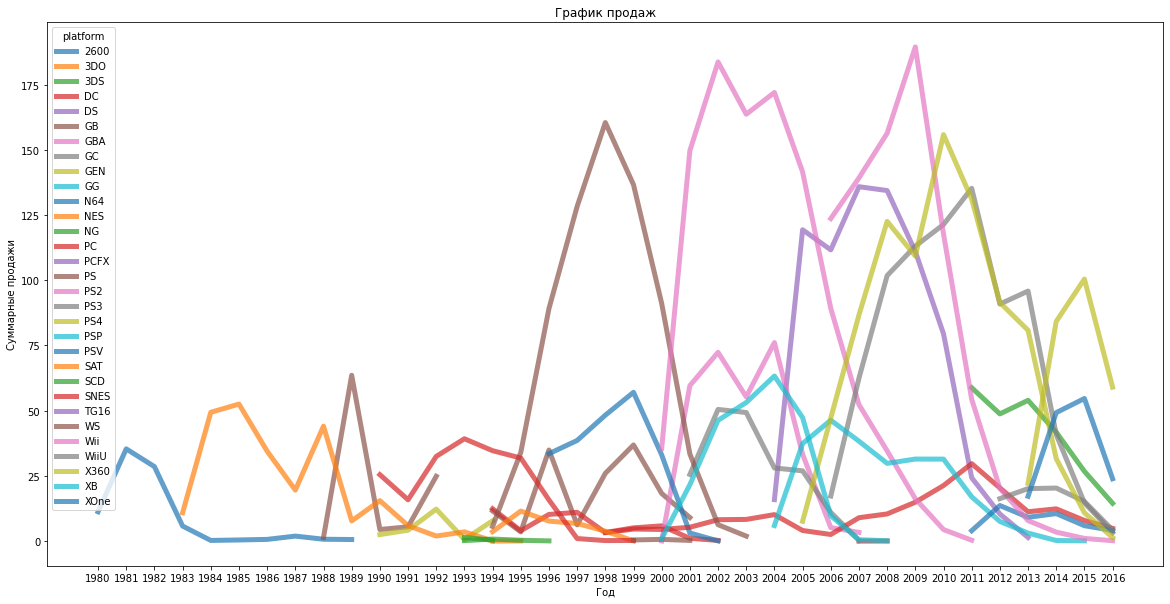

In [13]:
plat = data.pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')
plat.plot(kind = 'line', 
          figsize = (20,10),
          title = 'График продаж',
          linewidth = 5,
          alpha = 0.7,
          xticks = x,
          xlabel = 'Год',
          ylabel = 'Суммарные продажи'
    )

На графике видны наиболее популярные платформы. Обозначим порог в 75 миллионов продаж и построим отдельный график для преодолевших его платформ.

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

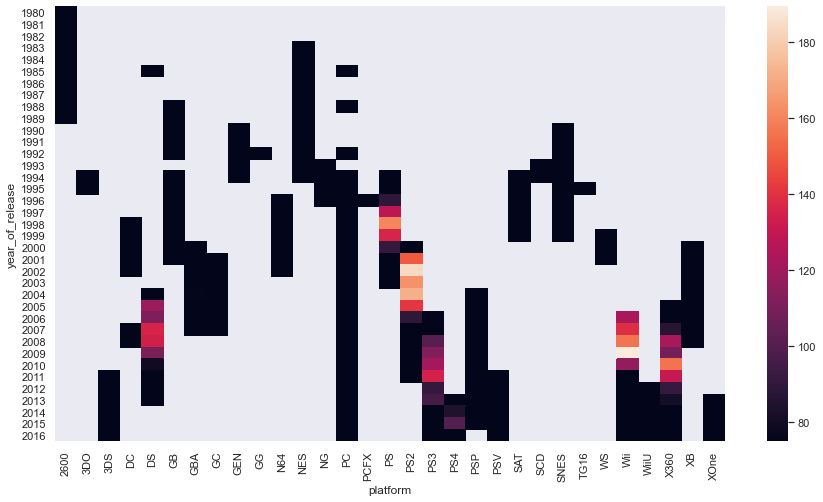

In [14]:
platform_by_year = data.pivot_table(index = 'year_of_release', 
                                    columns = 'platform', 
                                    values = 'total_sales', 
                                    aggfunc = 'sum')
seaborn.set(rc = {'figure.figsize':(15,8)})
seaborn.heatmap(plat, vmin = 75, xticklabels = 1, yticklabels = 1)

Я определил список самых популярных платформ, запишем его в переменную и построим график

In [15]:
top_list = ['X360','Wii','PS4','PS3','PS2','PS','DS']
top_data = data.copy().query('platform in @top_list')

<AxesSubplot:title={'center':'График продаж топ платформ'}, xlabel='Год', ylabel='Объем продаж'>

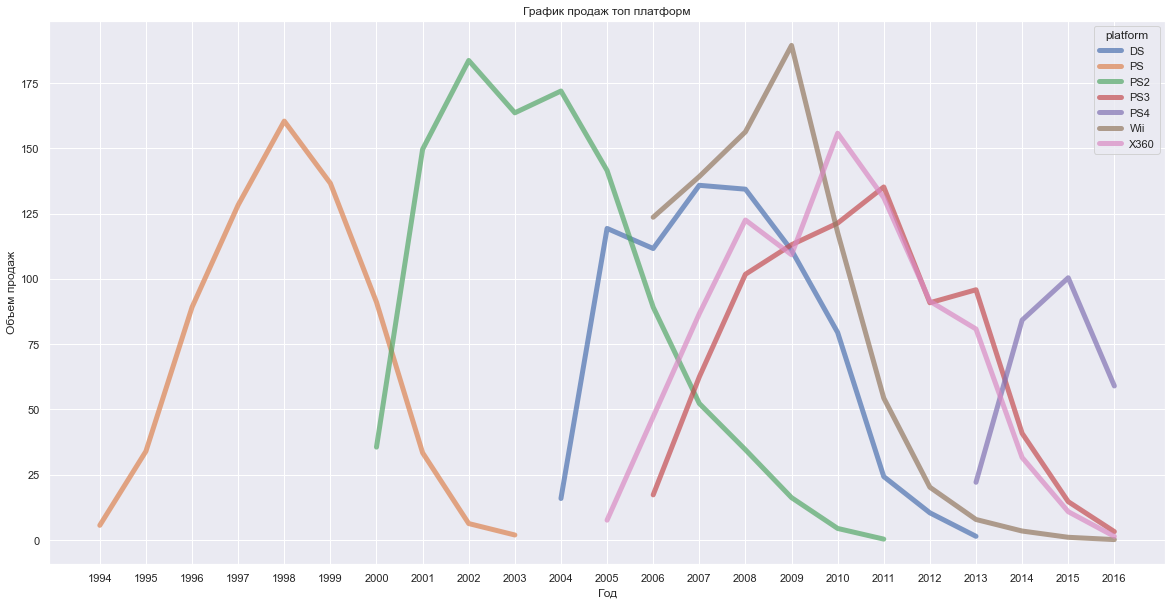

In [16]:
top_plat = top_data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
top_plat = top_plat.loc[top_plat.index !=1985]
top_plat.plot(kind = 'line', 
              figsize = (20,10),
              title = 'График продаж топ платформ',
              grid = True,
              linewidth = 5,
              alpha = 0.7,
              xticks = top_plat.index.unique(),
              xlabel = 'Год',
              ylabel = 'Объем продаж',
            
    )

Как видно, многие популярные платформы уже доживают свой век. Единственной актуальной является PS4, но так как рынок упал в целом. Более точно сделать выводы, можно только рассмартривая срез от 2013 года.

### За какой характерный срок появляются новые и исчезают старые платформы? 


Как видно из графиков, в среднем платформа живет около 10 лет. Её популярность растет 5 лет, а после снижается.

<AxesSubplot:title={'center':'Актуальное распределение продаж'}, xlabel='Год', ylabel='Продажи'>

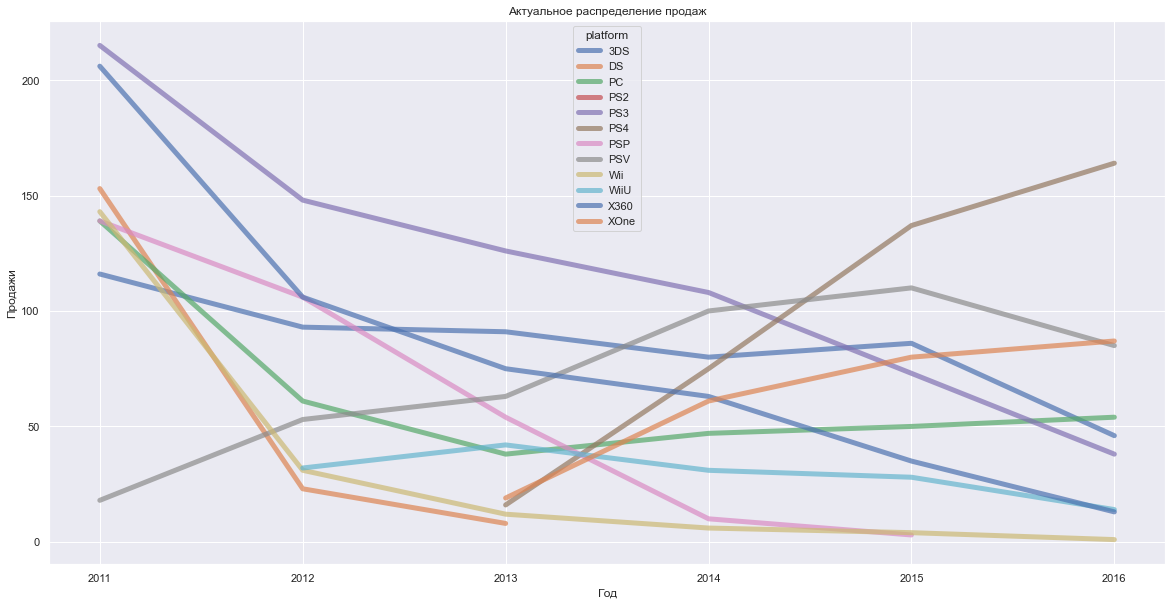

In [17]:
actual_data = data.query('year_of_release >= 2011')
actual_platform = actual_data.pivot_table(index = 'year_of_release', 
                                          columns = 'platform', 
                                          values = 'name', 
                                          aggfunc = 'count')
actual_platform.plot(kind = 'line', 
                     figsize = (20,10),
                     title = 'Актуальное распределение продаж',
                     grid = True,
                     linewidth = 5,
                     alpha = 0.7,
                     xlabel = 'Год',
                     ylabel = 'Продажи'
                    )

По данному графику мы видим, что лидерами по продажам сейчас являются PS4, XOne, PSV И PC. Из них мы можем выделить 3 основные. PS4 и XOne будут набирать популярность еще 2 года. PC является исключением и из-за конструктивных особенностей, эта платформа будет жить еще очень долго. По этому мы выделяем 3 платформы для продвижения.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [18]:
p_list=['PC','XOne','PS4']
actual_top_platform = actual_data.query('platform in @p_list')
actual_top_platform.loc['total_sales'] = actual_top_platform['total_sales'].copy()*1000000

<AxesSubplot:>

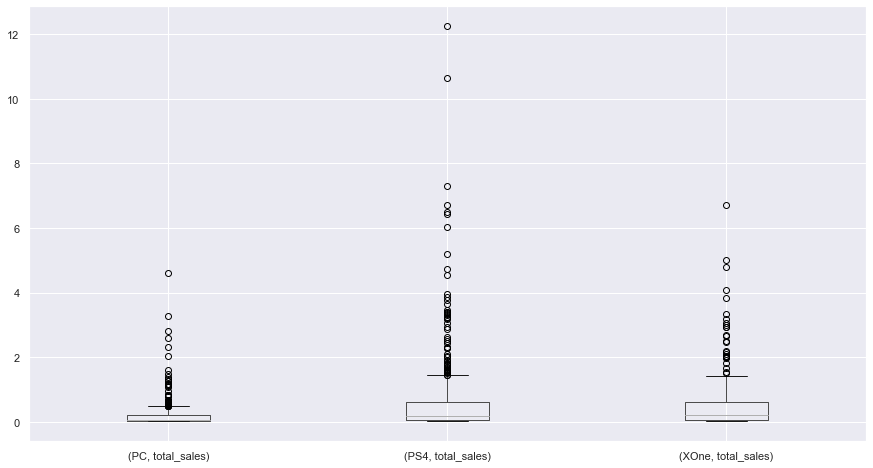

In [19]:
actual_group = actual_top_platform.groupby('platform')
actual_group.boxplot(subplots = False, column = ['total_sales'])

Мы видим, что на консолях продажи выше в 1,5-2 раза. Выбросы подческивают это, а так же означают выход "продающей" игры на этих платформах.
Традиционно продажи на PC ниже, что напрямую связанно с "пиратством"

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Определим таблицу для расчета корреляции. Очистим ее от пропусков, для более точного расчета.

In [20]:
corr_table = actual_top_platform[['platform','total_sales','critic_score','user_score']]
corr_table_clean = corr_table.loc[(corr_table['critic_score'].isna() == False) & (corr_table['user_score'].isna() == False)]

ps = corr_table.loc[corr_table['platform'] == 'PS4']
ps.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405887,-0.031261
critic_score,0.405887,1.000000,0.557654
user_score,-0.031261,0.557654,1.000000


<AxesSubplot:title={'center':'График разброса'}, xlabel='user_score', ylabel='total_sales'>

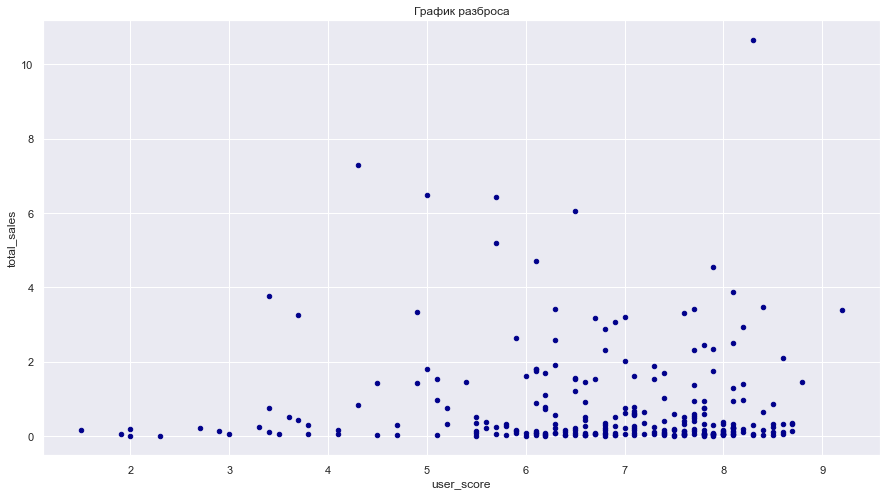

In [21]:
ps.plot(kind = 'scatter',
        x = 'user_score',
        y = 'total_sales',
        c = 'DarkBlue',
        title = 'График разброса'
       )

<AxesSubplot:>

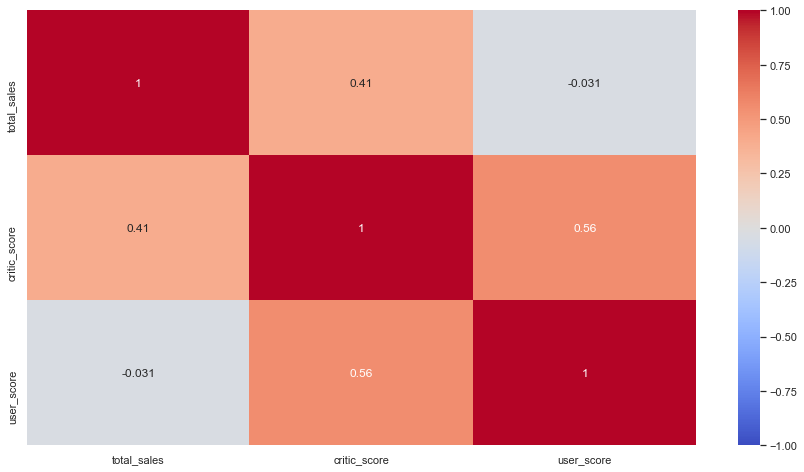

In [22]:
seaborn.heatmap(ps.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

Мы видим что корреляция между оценками критиков меньше 50%, что значит что она влияет не достаточно сильно. Это связано со спецификой оценок. Критики выставляют оценки исходя из множества критериев и сравнивать сухие цифры без сторонниф факторов не корректно.
В свою очередь мы видим отрицательную корреляцию у оценок игроков. Это так же связано со спецификой. Как правило для игроков это один из способов связи с разработчиками игр. Они могут специально занижать оценки на наиболее успешных играх, для того что бы обратить внимание на какую либо проблему.

Соотнесем выводы с продажами игр на других платформах. 

<AxesSubplot:>

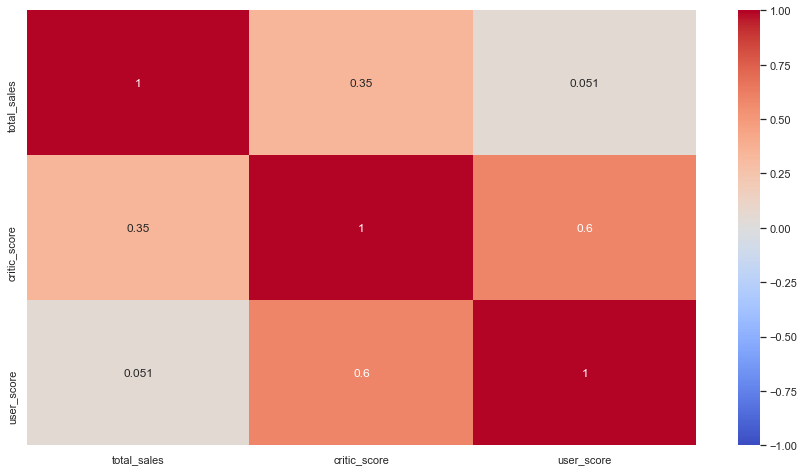

In [23]:
other_actual_table = actual_data.query('platform not in @p_list')
other_corr_table = other_actual_table[['platform','total_sales','critic_score','user_score']]
other_corr_table = other_corr_table.loc[(other_corr_table['critic_score'].isna() == False) & (other_corr_table['user_score'].isna() == False)]

seaborn.heatmap(other_corr_table.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

Данная таблица не противоречит ранее сказанному.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим сводную таблицу в которой рассмотрим сумму продаж по жанрам и их численность

In [24]:
genre_group = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum','count'])
genre_group.columns = genre_group.columns.get_level_values(0)
genre_group = genre_group.sort_values(by='sum',ascending=False)
genre_group

,sum,count
genre,,
Action,493.66,1269
Shooter,354.37,329
Role-Playing,225.95,465
Sports,208.27,389
Misc,127.01,375
Platform,80.48,122
Racing,78.20,180
Fighting,60.25,159
Simulation,46.73,136


Как видно, что наиболее доходные жанры являются самыми многочисленными. Исключением является жанр Adventure, что может быть связано с казуальностью данных игр. 

Рассмотрим долю 1 игры в сумме продаж

In [25]:
genre_group['mean'] = genre_group['sum']/genre_group['count']
genre_group = genre_group.sort_values(by='mean',ascending=False)
genre_group

,sum,count,mean
genre,,,
Shooter,354.37,329,1.077112
Platform,80.48,122,0.659672
Sports,208.27,389,0.535398
Role-Playing,225.95,465,0.485914
Racing,78.20,180,0.434444
Action,493.66,1269,0.389015
Fighting,60.25,159,0.378931
Simulation,46.73,136,0.343603
Misc,127.01,375,0.338693


По данной таблице видно что 3 топовых по продажам жанра пересекаются. Мы можем выделить Shooter, Sports, Role_Playing. Это жанры которые являются одними из самых прибыльных и игры в этом жанре имеют наибольшую долю, что делает их наиболее привлекательными для продвижения.

## Шаг 4. Составление портрета пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
    
1. Самые популярные платформы (топ-5). Описать различия в долях продаж.
2. Самые популярные жанры (топ-5). Пояснить разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?


### Популярные платформы

Соберем таблицу со всеми регионами и возьмем средние продажи. После этого рассмотрим в отдельности каждый регион.

In [26]:
sales_by_place = actual_data.groupby('platform')[['na_sales','eu_sales','jp_sales']].mean()

Выделяем каждый регион в отдельную таблицу

In [27]:
na = sales_by_place[['na_sales']].sort_values(by='na_sales',ascending=False).head(5)
eu = sales_by_place[['eu_sales']].sort_values(by='eu_sales',ascending=False).head(5)
jp = sales_by_place[['jp_sales']].sort_values(by='jp_sales',ascending=False).head(5)

Определим функцию для отображения таблиц рядом и сравним получившиеся данные.

In [28]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [29]:
display_side_by_side(na,eu,jp)

,na_sales
platform,
X360,0.455422
XOne,0.377004
PS4,0.277398
WiiU,0.259184
Wii,0.246497
,eu_sales
platform,
PS4,0.359923
X360,0.235141


#### Северная Америка
На этом рынке преобладают стационарные консоли. Наиболее популярными являются продукты компании Microsoft (США). После идет последняя консоль от компании Sony (Япония) и замыкают 5-ку портативная и классическая консоли Nintendo(Япония).
Из этого можно сделать вывод что для данного региона наиболее актуальны "свежие", поддерживаемые консоли.
#### Европа
Европейский рынок в меру близости менталитета схож по преобладанию консолей. Однако, в "старом свете" продажи уступают Американским. Самой кассовой консолью является "свежая" PS4. Далее на идентичном уровне идут предпоследние версии XBox и PS. Замыкают пятерку XBox One и Wii U.
#### Япония
Японский рынок значительно отличается от западного. Вся первая 5-ка состоит полностью из портативных консолей Японского производства за исключением PS3. Последняя (возможно) закрепила свою позицию за счет, того что была прорывной во многих отношениях. Учитывая консервативный менталитет Японии, данная консоль будет сдавать позиции крайне медленно, пока ее место будет занимать следующая версия(PS4).

### Жанры

Рассмотрим популярность жанров в разных регионах

In [30]:
ganres_by_place = actual_data.groupby('genre')[['na_sales','eu_sales','jp_sales']].mean()
na_g = ganres_by_place[['na_sales']].sort_values(by='na_sales',ascending=False).head(5)
eu_g = ganres_by_place[['eu_sales']].sort_values(by='eu_sales',ascending=False).head(5)
jp_g = ganres_by_place[['jp_sales']].sort_values(by='jp_sales',ascending=False).head(5)
display_side_by_side(na_g,eu_g,jp_g)

,na_sales
genre,
Shooter,0.590973
Platform,0.313770
Sports,0.279434
Fighting,0.198931
Misc,0.185840
,eu_sales
genre,
Shooter,0.449909
Platform,0.246475


#### Западные регионы
Первая 3-ка одинакова в Северной Америке и Европе. Из жизненного опыта мы знаем,что западные страны более либерализованны и имеют схожие "брутальные" вкусы. Это объясняет первенство шутеров. Далее мы видим платформеры(дети и любители классических игр) и спортивные игры (высокая популярность спорта в западных странах).

Однако в Северной Америке 5-ку замыкают Файтинги и Музыкальные игры. Это может сказать о том, что аудитория крайне обширна и физически активна. По первой пятерке мы можем сделать вывод ,что пользовательская аудитория крайне обширна по полу, возрасту и заинтересована в динамичных играх. 

#### Япония
В этом регионе мы наблюдаем такое распределение:
1. Ролевые игры - напрямую связано с популярностью аниме тематики
2. Платформеры - классические игры популярны за счет консерватизма и типа платформы популярной в регионе
3. Симуляторы 
4. Файтинги 
5. Экшн 

Последние 2 жанра удовлетворяют спрос на более агрессивные игры и укладываются в ограничения установленные в этой стране(кровь, насилие и прочее в играх законодательно ограничено)

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим таблицы с топами жанров и платформ

In [31]:
#Япония
japan_esrb = jp_g.reset_index()
japan_esrb = japan_esrb[['genre']].head(5)
#Америка
american_esrb = na_g.reset_index()
american_esrb = american_esrb[['genre']].head(5)
#Европа
european_esrb = eu_g.reset_index()
european_esrb = european_esrb[['genre']].head(5)

Запишем данные жанры в список

In [32]:
genre_japan_list = []
genre_american_list = []
genre_european_list = []

for row in japan_esrb['genre']:
    genre_japan_list.append(row)
    
for row in american_esrb['genre']:
    genre_american_list.append(row)    
    
for row in european_esrb['genre']:
    genre_european_list.append(row)    
    

In [33]:
japan_p = jp.reset_index()
japan_p = japan_p['platform']

american_p = na.reset_index()
american_p = american_p['platform']

european_p = eu.reset_index()
european_p = european_p['platform']

platform_japan_list = []
platform_american_list = []
platform_european_list = []

for row in japan_p:
    platform_japan_list.append(row)
    
for row in american_p:
    platform_american_list.append(row)    
    
for row in european_p:
    platform_european_list.append(row)    
    

In [34]:
japan_g = actual_data.query('genre in @genre_japan_list and platform in @platform_japan_list')
american_g = actual_data.query('genre in @genre_american_list and platform in @platform_american_list')
european_g = actual_data.query('genre in @genre_european_list and platform in @platform_european_list')

japan_g = japan_g[japan_g['rating'].isna()==False]
american_g = american_g[american_g['rating'].isna()==False]
european_g = european_g[european_g['rating'].isna()==False]

jp_rating = japan_g[['rating']].value_counts().to_frame()
jp_rating.columns = jp_rating.columns.get_level_values(0)
jp_rating = jp_rating.rename(columns={'0':'jp'})

na_rating = american_g[['rating']].value_counts().to_frame()
na_rating.columns = na_rating.columns.get_level_values(0)
na_rating = na_rating.rename(columns={'0':'na'})

eu_rating = european_g[['rating']].value_counts().to_frame()
eu_rating.columns = eu_rating.columns.get_level_values(0)
eu_rating = eu_rating.rename(columns={'0':'eu'})


In [35]:
display_side_by_side(jp_rating,na_rating,eu_rating)

,0
rating,
T,229
E10+,145
M,124
E,90
,0
rating,
E,186
T,121
M,118


#### Япония 
самый популярный рейтинг "для детей" и "для детей 10+".Далее "Для взрослых" и "для всех". Виден плавный спад количества игр по рейтингу.
#### Америка  
Рынок более предрасположен к играм "для всех", следом идет "для детей" , "для взрослых" и "для детей 10+". Распределение более равномерное. 
#### Европа 
С огромным отрывом тут лидируют игры "для взрослых", следом "для всех" и замыкают список "для детей" и "для детей +10"

## Шаг 5. Проверим гипотезы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


Определим таблицы с целевыми платформами и жанрами, очистим данные от пропусков в user_score

In [36]:
#Платформы
target_p = actual_data.loc[(actual_data['platform']=='XOne')|(actual_data['platform']=='PC')]
target_p = target_p[target_p['user_score'].isna()==False]
#Жанры
target_g = actual_data.loc[(actual_data['genre']=='Action')|(actual_data['genre']=='Sports')]
target_g = target_g[target_g['user_score'].isna()==False]

Соберем сводную таблицу со средним, дисперсией и стандартным отклонением для каждой гипотезы

In [37]:
pivot_table_p = target_p.pivot_table(index='platform', values='user_score', aggfunc=['var', 'std','mean'])
pivot_table_p

,var,std,mean
,user_score,user_score,user_score
platform,,,
PC,2.596296,1.611303,6.451792
XOne,1.906997,1.380941,6.521429


In [38]:
pivot_table_g = target_g.pivot_table(index='genre', values='user_score', aggfunc=['var', 'std','mean'])
pivot_table_g

,var,std,mean
,user_score,user_score,user_score
genre,,,
Action,1.811877,1.346060,6.775904
Sports,2.882510,1.697795,5.650813


Так как мы имеем разные размерности нам необходимо разбить выборку на статы. Это нормализует распределение и позволит корректно сравнить среднее совокупностей. 

In [39]:
#Для первой гипотезы
stat_pc = target_p[target_p['platform']=='PC']['user_score'].sample(50).to_frame()
stat_xo = target_p[target_p['platform']=='XOne']['user_score'].sample(50).to_frame()

#Для второй гипотезы
stat_ac = target_g[target_g['genre']=='Action']['user_score'].sample(50).to_frame()
stat_sp = target_g[target_g['genre']=='Sports']['user_score'].sample(50).to_frame()

Рассмотрим распределения

array([[<AxesSubplot:title={'center':'user_score'}>]], dtype=object)

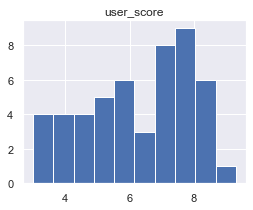

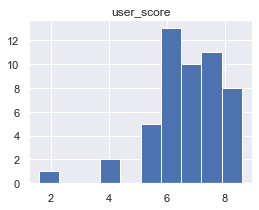

In [40]:
#для первого теста
stat_pc.hist(figsize=(4,3))
stat_xo.hist(figsize=(4,3))

array([[<AxesSubplot:title={'center':'user_score'}>]], dtype=object)

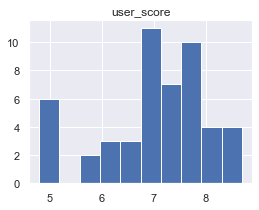

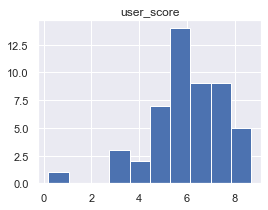

In [41]:
#для второго теста
stat_ac.hist(figsize=(4,3))
stat_sp.hist(figsize=(4,3))

При множественной проверке мы можем видеть, что распределение строится вокруг среднего этих совокупностей. Переодические отклонения не находятся от среднего дальше величины стандартного отклонения

### Проверим гипотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Примем за нулевую гипотезу слудущее: "средние пользовательские рейтинги платформ Xbox One и PC равны"

Альтернативной гипотезой станет целевая для нас "средние пользовательские рейтинги платформ Xbox One и PC различается "

In [42]:
alpha = 0.05

results = st.ttest_ind(stat_pc, stat_xo, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue != alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.34935006]
Отвергаем нулевую гипотезу


По результатам теста первую гипотезу мы отвергаем

### Проверим гипотезу "средние пользовательские рейтинги жанров Action и Sports разные"

Примем за нулевую гипотезу слудущее: "средние пользовательские рейтинги жанров Action и Sports равны"

Альтернативной гипотезой станет целевая для нас "средние пользовательские рейтинги жанров Action и Sports разные "

Проведем тест

In [43]:
alpha = 0.05

results = st.ttest_ind(stat_ac, stat_sp, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue != alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.00023327]
Отвергаем нулевую гипотезу


В данном тесте мы отвергаем нулевую гипотезу и альтернативной является интересующая нас. Её мы отвергнуть не можем, потому оставляем ее как единственную возможно верную.

## Шаг 6. Напишите общий вывод

1. Мы рассмотрели данные на предмет ошибок и пропусков. 

    В данном датафрейме мы увидели данные за долгие 36 лет. С момента зарождения игровой индустрии и до наших дней. В данных были не многочисленные пропуски как в названиях, жанрах так и в годе выхода. В ходе предобработки данных, было принято решение: отбросить часть данных по двум причинам:
    1. На данном этапе мы не владеем парсингом для заполнения части данных. 
    2. Данные 30 летней давности не скажутся на общем исследовании

2. Мы рассмотрели график выхода игр в целом.

<AxesSubplot:title={'center':'График кол-ва релизов'}, xlabel='Год', ylabel='Кол-во релизов'>

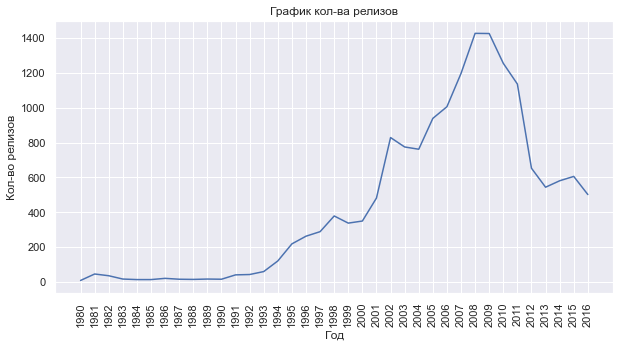

In [44]:
games.plot( kind = 'line', title = 'График кол-ва релизов', grid = True, figsize = (10,5), rot = 90, xticks = x, xlabel = 'Год',ylabel = 'Кол-во релизов' )

3. Общие продажи по платформам за все годы и топ 10 платформ.

<AxesSubplot:title={'center':'График продаж топ платформ'}, xlabel='Год', ylabel='Объем продаж'>

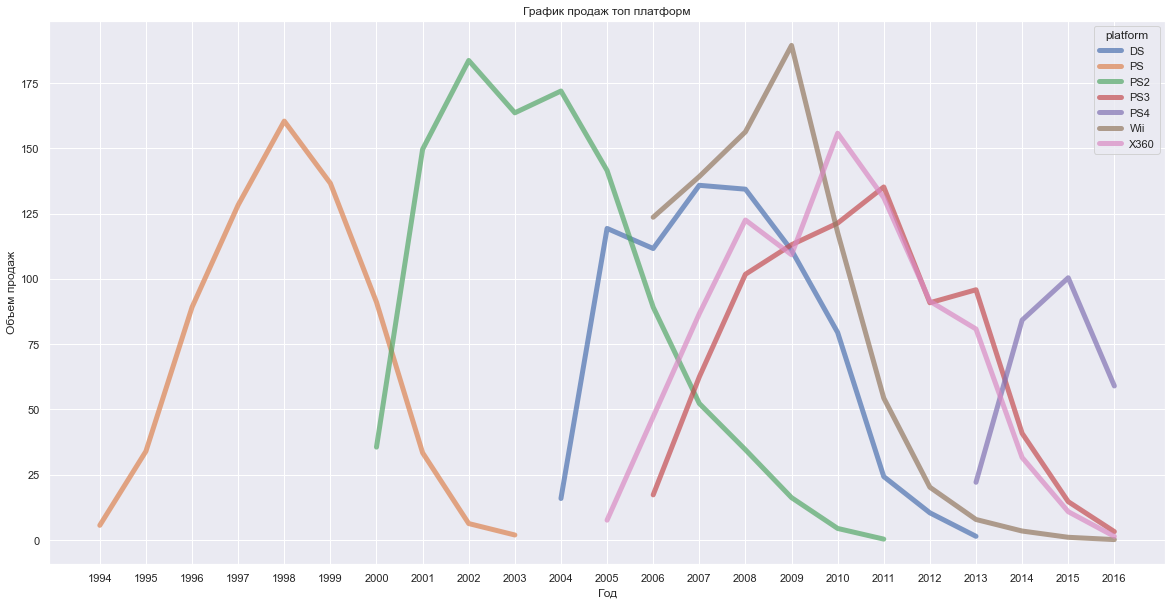

In [45]:
top_plat.plot(kind = 'line', figsize = (20,10), title = 'График продаж топ платформ', grid = True, linewidth = 5, alpha = 0.7, xticks = top_plat.index.unique(), xlabel = 'Год', ylabel = 'Объем продаж')

4. Был определен жизненный цикл платформ. 

    Консоли поддерживаются 10 лет от старта продаж, до момента полного выхода с рынка. Уже через 5 лет консоль достигает пика своей популярности и  начинает с каждым годом терять свою актуальность.  

    Данная тенденция не влияет на ПК. ПК является модульной и обновляемой платформой, что значит что она останется актуальной еще десятилетия. 
    
    
5. На основе тенденций выделены 3 наиболее перспективные по продажам платформы
    
    Был построен график распределения продаж по платформам:

<AxesSubplot:>

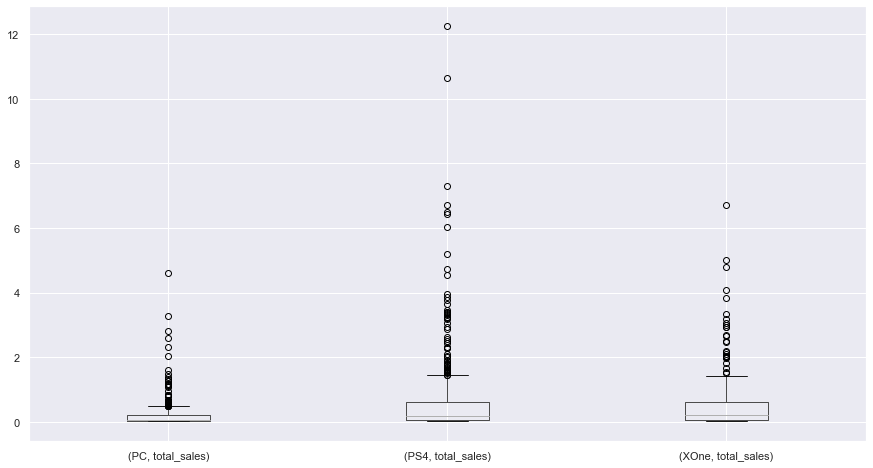

In [46]:
actual_group.boxplot(subplots=False,column=['total_sales'])

6. Сильной связи между оценками критиков/пользователей и продажами не обнаружено.
    Предположительно, из-за специфики коммуникации пользователей с компанией разработчиком, оценки пользователей не коррелируют с продажами.
    
    
7.  Рассмотрены регионы для определения портрета пользователя 


    1. Определены топ-5 платформ по продажам для каждого региона

In [47]:
display_side_by_side(na,eu,jp)

,na_sales
platform,
X360,0.455422
XOne,0.377004
PS4,0.277398
WiiU,0.259184
Wii,0.246497
,eu_sales
platform,
PS4,0.359923
X360,0.235141


    2. Определены топ-5 жанров для каждого региона

In [48]:
display_side_by_side(na_g,eu_g,jp_g)

,na_sales
genre,
Shooter,0.590973
Platform,0.313770
Sports,0.279434
Fighting,0.198931
Misc,0.185840
,eu_sales
genre,
Shooter,0.449909
Platform,0.246475


    3. Распределение игр по возрастному рейтингу

In [49]:
display_side_by_side(na_rating,eu_rating,jp_rating)

,0
rating,
E,186
T,121
M,118
E10+,117
,0
rating,
M,356
E,279
T,208


8. Были проверены гипотезы:
    1. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые - Отвергнута по результатам статистического теста
    2. Средние пользовательские рейтинги жанров Action и Sports разные - Мы не смогли отвергнуть данную гипотезу